# Logistic Regression

## Importing the libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [12]:
wines = pd.read_csv('winequality-red.csv')
X = wines.iloc[:, :-1].values
y = wines.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic regression model on the Training set

In [15]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

## Showing the results on the Test set + Confusion Matrix

[[  0   0   2   0   0   0]
 [  0   0   9   4   1   0]
 [  0   0 130  39   0   0]
 [  0   0  45 109  16   0]
 [  0   0   3  22  15   0]
 [  0   0   0   3   2   0]]
Accuracy score: 0.635

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.69      0.77      0.73       169
           6       0.62      0.64      0.63       170
           7       0.44      0.38      0.41        40
           8       0.00      0.00      0.00         5

    accuracy                           0.64       400
   macro avg       0.29      0.30      0.29       400
weighted avg       0.60      0.64      0.61       400

F1 score: 0.6143869978039154



c:\Users\tamim\Desktop\BCIT\Term_4\ACIT4880\virtual_environment\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamim\Desktop\BCIT\Term_4\ACIT4880\virtual_environment\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamim\Desktop\BCIT\Term_4\ACIT4880\virtual_environment\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

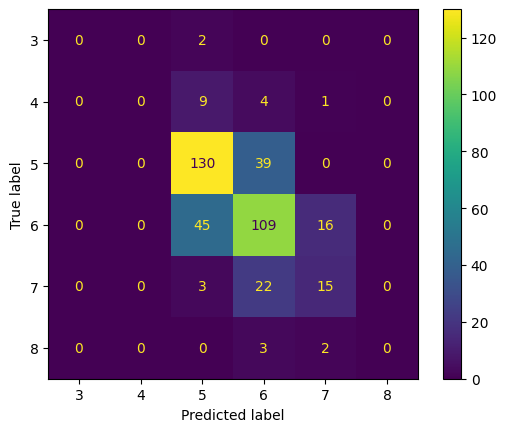

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}", end='\n\n')

print(classification_report(y_test, y_pred))

print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}", end='\n\n')

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regression.classes_)
disp.plot()

## Divide wine into good and bad quality

In [17]:
wines = pd.read_csv('winequality-red.csv')
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wines['quality'] = pd.cut(wines['quality'], bins = bins, labels = group_names)

from sklearn.preprocessing import LabelEncoder

label_quality = LabelEncoder()

wines["quality"] = label_quality.fit_transform(wines["quality"])
wines["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Train Logistic Regression again to predict good or bad quality

[[337  10]
 [ 37  16]]
Accuracy score: 0.8825

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       347
           1       0.62      0.30      0.41        53

    accuracy                           0.88       400
   macro avg       0.76      0.64      0.67       400
weighted avg       0.86      0.88      0.86       400

F1 score: 0.8646209554240769



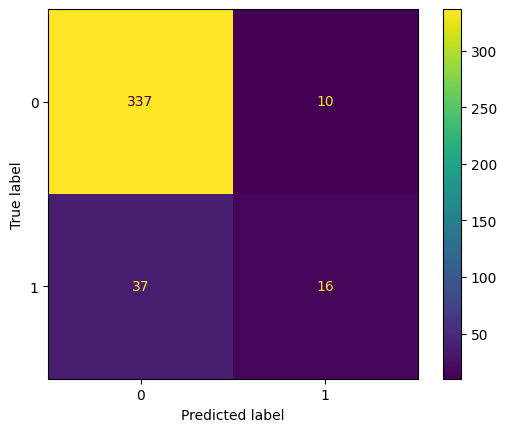

In [18]:
X = wines.drop('quality', axis = 1)
y = wines['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

quality_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
quality_classifier.fit(X_train, y_train)
y_pred = quality_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}", end='\n\n')

print(classification_report(y_test, y_pred))

print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}", end='\n\n')

new_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=new_cm, display_labels=quality_classifier.classes_)
disp.plot()